In [120]:
import csv
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt
import io
import pandas as pd
from IPython.display import HTML as html_print

In [121]:
class Stocks:
    dates = []
    dates_index = []
    prices = []
    data_size = 20

In [122]:
    for i in range(0, data_size):
        dates_index.append(i)
        # print(dates_index[i])

In [127]:
    def csv_to_arrays():
        df = pd.read_csv('https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=TSLA&apikey=U3B8JD1PC1LRJ7ZD&datatype=csv')
        # print(df.head())
        # print(df.values)
        # print(len(df.index))

        for i in range(0, data_size):
            # len(df.index)
            dates.append(df.iloc[i][0])
            prices.append(df.iloc[i][1])    
            # print(dates[i])
            # print(prices[i])

In [123]:
    def predictor(dates, prices, dates_index, data_size):
        # consider adding C=1e3 (default 1)
        # smaller C encourages larger margin, and resultantly simpler decision
        # larger C encourages smaller margin, and better at classifying points
        # consider adding gamme='scale' (default auto -> 1/n)
        # smaller gamma constrains cannot capture complexity of shape (whole training set)
        # larger gamma results in only including vector itself

        # dates_index = np.reshape(dates_index, (len(dates), 1))
        dates_index = np.reshape(dates_index, (len(dates), 1))

        lin = SVR(kernel='linear', C=1e5)
        poly2 = SVR(kernel='poly', degree=2, C=1e3)
        poly3 = SVR(kernel='poly', degree=3)
        poly4 = SVR(kernel='poly', C=1e-2, degree=4)
        rbf = SVR(kernel='rbf', C=1e4)

        lin.fit(dates_index, prices)
        poly2.fit(dates_index, prices)
        poly3.fit(dates_index, prices)    
        poly4.fit(dates_index, prices)    
        rbf.fit(dates_index, prices)

        plt.scatter(dates_index, prices)
        plt.plot(dates_index, lin.predict(dates_index), color = 'yellow', label = 'Linear')
        plt.plot(dates_index, poly2.predict(dates_index), color = 'green', label = 'Polynomial (2nd Degree)')
        plt.plot(dates_index, poly3.predict(dates_index), color = 'orange', label = 'Polynomial (3rd Degree)')
        plt.plot(dates_index, poly4.predict(dates_index), color = 'purple', label = 'Polynomial (4th Degree)')
        plt.plot(dates_index, rbf.predict(dates_index), color = 'blue', label = 'Radial Basis Function')
        plt.ylabel('Price (USD)')
        plt.xlabel(str(data_size) +' Days ('+ dates[0] + ' to ' + dates[data_size - 1] + ')')
        plt.title('Support Vector Regression')
        plt.legend()
        plt.show()

        # print(dates)

        return lin.predict(data_size)[0], poly2.predict(data_size)[0], poly3.predict(data_size)[0], poly4.predict(data_size)[0], rbf.predict(data_size)[0]

In [124]:
    def cstr(s, color='black'):
        return "<text style=color:{}>{}</text>".format(color, s)

In [125]:
    def plus_minus(value):
        value = round(value, 2)
        if value > 0:
            print(' (+' + str(value) + ')')
        else:
            print(' (' + str(value) + ')')
            # print colored(value, 'green')

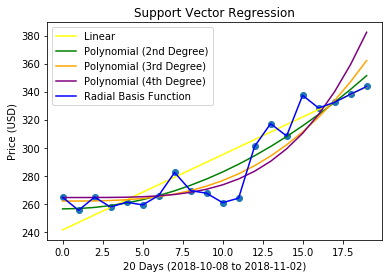

Linear Predicition is: 348.76 (+5.02)
Polynomial of 2nd Degree Predicition is: 361.68 (+17.94)
Polynomial of 3rd Degree Predicition is: 378.85 (+35.11)
Polynomial of 4th Degree Predicition is: 409.25 (+65.51)
Radial Basis Function Predicition is: 306.82 (-36.92)


In [115]:
    predictor = predictor(dates, prices, dates_index, data_size)

    # print ('Linear Predicition is: ' + str(round(predictor[0],2)) + ' (' + str(round((predictor[0] - prices[data_size-1]),2)) + ')')
    # print ('Polynomial of 2nd Degree Predicition is: ' + str(round(predictor[1],2)) + ' (' + str(round((predictor[1] - prices[data_size-1]),2)) + ')')
    # print ('Polynomial of 3rd Degree Predicition is: ' + str(round(predictor[2],2)) + ' (' + str(round((predictor[2] - prices[data_size-1]),2)) + ')')
    # print ('Polynomial of 4th Degree Predicition is: ' + str(round(predictor[3],2)) + ' (' + str(round((predictor[3] - prices[data_size-1]),2)) + ')')
    # print ('Radial Basis Predicition is: ' + str(round(predictor[4],2)) + ' (' + str(round((predictor[4] - prices[data_size-1]),2)) + ')')

    print(('Linear Predicition is: ' + str(round(predictor[0],2))), end='')
    plus_minus(predictor[0] - prices[data_size-1])
    print(('Polynomial (2nd Degree) Predicition is: ' + str(round(predictor[1],2))), end='')
    plus_minus(predictor[1] - prices[data_size-1])
    print(('Polynomial (3rd Degree) Predicition is: ' + str(round(predictor[2],2))), end='')
    plus_minus(predictor[2] - prices[data_size-1])
    print(('Polynomial (4th Degree) Predicition is: ' + str(round(predictor[3],2))), end='')
    plus_minus(predictor[3] - prices[data_size-1])
    print(('Radial Basis Function Predicition is: ' + str(round(predictor[4],2))), end='')
    plus_minus(predictor[4] - prices[data_size-1])

2018-11-02
343.74
2018-11-01
338.26
2018-10-31
332.54
2018-10-30
328.39
2018-10-29
337.47
2018-10-26
308.25
2018-10-25
317.22
2018-10-24
301.05
2018-10-23
263.87
2018-10-22
260.68
2018-10-19
267.39
2018-10-18
269.29
2018-10-17
282.4
2018-10-16
265.7
2018-10-15
259.06
2018-10-12
261.0
2018-10-11
257.53
2018-10-10
264.61
2018-10-09
255.25
2018-10-08
264.52


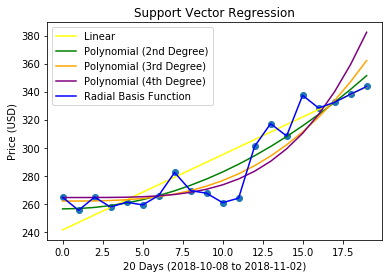

Linear Predicition is: 348.76 (+5.02)
Polynomial (2nd Degree) Predicition is: 361.68 (+17.94)
Polynomial (3rd Degree) Predicition is: 378.85 (+35.11)
Polynomial (4th Degree) Predicition is: 409.25 (+65.51)
Radial Basis Function Predicition is: 306.82 (-36.92)


In [126]:
    csv_to_arrays()
    prices.reverse()
    dates.reverse()
    predictor = predictor(dates, prices, dates_index, data_size)

    print(('Linear Predicition is: ' + str(round(predictor[0],2))), end='')
    plus_minus(predictor[0] - prices[data_size-1])
    print(('Polynomial (2nd Degree) Predicition is: ' + str(round(predictor[1],2))), end='')
    plus_minus(predictor[1] - prices[data_size-1])
    print(('Polynomial (3rd Degree) Predicition is: ' + str(round(predictor[2],2))), end='')
    plus_minus(predictor[2] - prices[data_size-1])
    print(('Polynomial (4th Degree) Predicition is: ' + str(round(predictor[3],2))), end='')
    plus_minus(predictor[3] - prices[data_size-1])
    print(('Radial Basis Function Predicition is: ' + str(round(predictor[4],2))), end='')
    plus_minus(predictor[4] - prices[data_size-1])

foo
